In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose,STL


In [3]:
df=pd.read_excel('ukspendingoncreditanddebitcardsdataset261023.xlsx',sheet_name='Daily CHAPS indices',header=3)
df.head()

,Date,Aggregate,Delayable,Social,Staple,Work Related
0,2020-01-13,93.97322,97.07899,88.84211,95.79024,91.24497
1,2020-01-14,92.79815,94.54525,89.49649,94.27784,90.90500
2,2020-01-15,92.67429,93.91213,90.90255,93.12012,91.71690
3,2020-01-16,93.02361,93.19305,92.40377,93.53754,92.39457
4,2020-01-17,93.13415,92.13038,93.56357,93.81503,93.35457


In [4]:
df['Date']=pd.to_datetime(df['Date'])
# df=df.set_index('Date')
df.set_index('Date', inplace=True)
df

,Aggregate,Delayable,Social,Staple,Work Related
Date,,,,,
2020-01-13,93.973220,97.078990,88.842110,95.790240,91.244970
2020-01-14,92.798150,94.545250,89.496490,94.277840,90.905000
2020-01-15,92.674290,93.912130,90.902550,93.120120,91.716900
2020-01-16,93.023610,93.193050,92.403770,93.537540,92.394570
2020-01-17,93.134150,92.130380,93.563570,93.815030,93.354570
...,...,...,...,...,...
2023-10-13,96.819943,75.673829,98.363096,110.036619,138.572040
2023-10-16,97.285249,77.039766,97.176921,111.113312,138.541744
2023-10-17,97.424023,77.709726,96.457432,111.442455,138.694166


In [5]:
[i.weekday() for i in df.tail(7).index.tolist()], df.tail(7).index

([2, 3, 4, 0, 1, 2, 3],
 DatetimeIndex(['2023-10-11', '2023-10-12', '2023-10-13', '2023-10-16',
                '2023-10-17', '2023-10-18', '2023-10-19'],
               dtype='datetime64[ns]', name='Date', freq=None))

In [6]:
seasonal[-9:-4].plot()

NameError: name 'seasonal' is not defined

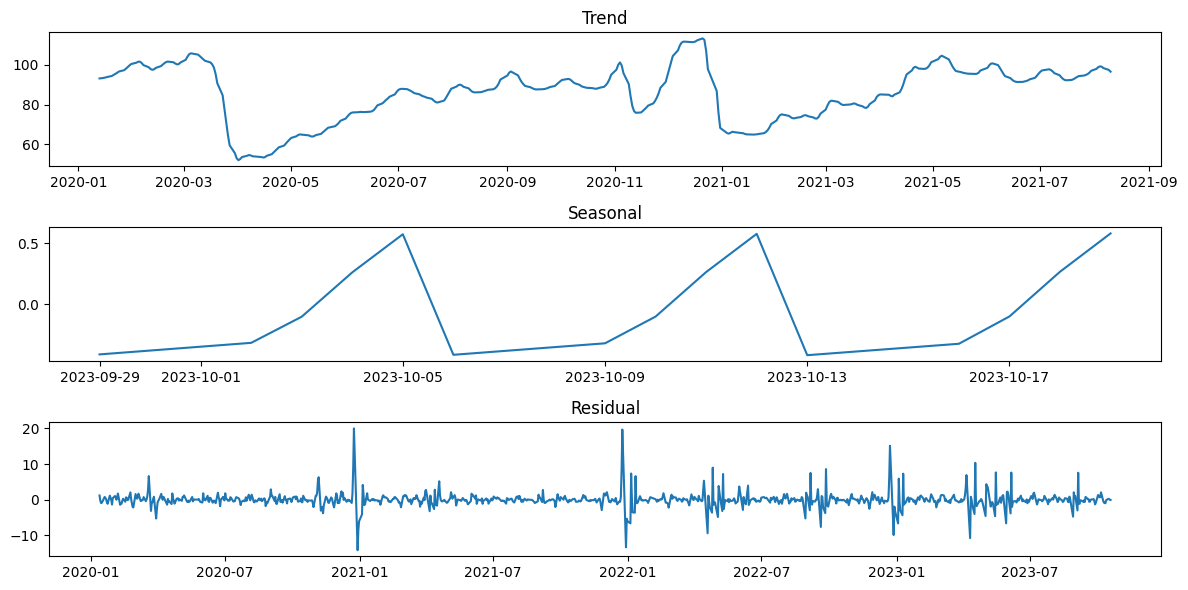

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load your daily weekday data
# Make sure to have a 'Date' column and a 'Value' column


# Perform STL decomposition
stl = STL(df['Aggregate'],period=5, seasonal=365)  # 365-day seasonal window (to capture monthly and yearly seasonality)
result = stl.fit()

# Get the trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the decomposed components
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(trend[:400])
plt.title('Trend')
plt.subplot(312)
plt.plot(seasonal[-15::])
plt.title('Seasonal')
plt.subplot(313)
plt.plot(residual)
plt.title('Residual')
plt.tight_layout()
plt.show()


In [29]:
df['Weekday']=[i.weekday() for i in df.index.tolist()]
df.tail()

,Aggregate,Delayable,Social,Staple,Work Related,Weekday
Date,,,,,,
2023-10-13,96.819943,75.673829,98.363096,110.036619,138.572040,4
2023-10-16,97.285249,77.039766,97.176921,111.113312,138.541744,0
2023-10-17,97.424023,77.709726,96.457432,111.442455,138.694166,1
2023-10-18,97.604626,78.015793,96.313480,111.847301,138.568594,2
2023-10-19,97.880360,78.824784,96.031718,112.159412,138.279858,3


In [31]:
days_of_week = {'0':"Monday", '1':"Tuesday", '2':"Wednesday", '3':"Thursday", '4':"Friday", '5':"Saturday", '6':"Sunday"}
df['Day']=[days_of_week[str(i)] for i in df['Weekday']]
df.tail()

,Aggregate,Delayable,Social,Staple,Work Related,Weekday,Day
Date,,,,,,,
2023-10-13,96.819943,75.673829,98.363096,110.036619,138.572040,4,Friday
2023-10-16,97.285249,77.039766,97.176921,111.113312,138.541744,0,Monday
2023-10-17,97.424023,77.709726,96.457432,111.442455,138.694166,1,Tuesday
2023-10-18,97.604626,78.015793,96.313480,111.847301,138.568594,2,Wednesday
2023-10-19,97.880360,78.824784,96.031718,112.159412,138.279858,3,Thursday


In [41]:
seasonal[-5:]

Date
2023-10-13   -0.418978
2023-10-16   -0.325137
2023-10-17   -0.100523
2023-10-18    0.266789
2023-10-19    0.581791
Name: season, dtype: float64

In [43]:
df.groupby('Day')['Aggregate'].mean()

Day
Friday       95.389308
Monday       94.724863
Thursday     95.022427
Tuesday      94.974931
Wednesday    95.087646
Name: Aggregate, dtype: float64

# Monthly data

In [92]:
dm=pd.DataFrame(df.Aggregate.resample('M').mean())
dm.head()

,Aggregate
Date,
2020-01-31,95.803285
2020-02-29,99.999992
2020-03-31,90.758310
2020-04-30,55.853971
2020-05-31,66.214348


In [94]:
range(len(dm.index))
dm.index

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [96]:
dm['Month']=[dm.index[i].strftime("%B") for i in range(len(dm.index))]
dm.head()

,Aggregate,Month
Date,,
2020-01-31,95.803285,January
2020-02-29,99.999992,February
2020-03-31,90.758310,March
2020-04-30,55.853971,April
2020-05-31,66.214348,May


In [104]:
STL(dm.Aggregate).fit().seasonal

Date
2020-01-31     1.393460
2020-02-29     6.491380
2020-03-31     1.051304
2020-04-30   -22.196600
2020-05-31   -12.699049
2020-06-30    -4.496246
2020-07-31     0.313268
2020-08-31     3.159738
2020-09-30     4.968133
2020-10-31     5.032112
2020-11-30     1.770233
2020-12-31    16.998555
2021-01-31    -7.050551
2021-02-28    -0.655206
2021-03-31    -0.778335
2021-04-30    -9.379814
2021-05-31    -3.573838
2021-06-30    -1.534632
2021-07-31     0.270603
2021-08-31    -0.143225
2021-09-30     0.596844
2021-10-31     1.811996
2021-11-30     3.752841
2021-12-31    16.535046
2022-01-31   -11.612284
2022-02-28    -4.733455
2022-03-31    -1.532849
2022-04-30    -0.774935
2022-05-31     2.299007
2022-06-30     0.509294
2022-07-31    -0.328130
2022-08-31    -3.187987
2022-09-30    -3.232809
2022-10-31    -1.600872
2022-11-30     5.099696
2022-12-31    16.273703
2023-01-31   -11.213804
2023-02-28    -4.519680
2023-03-31    -0.343882
2023-04-30     2.833124
2023-05-31     4.129961
2023-06-30 

<BarContainer object of 12 artists>

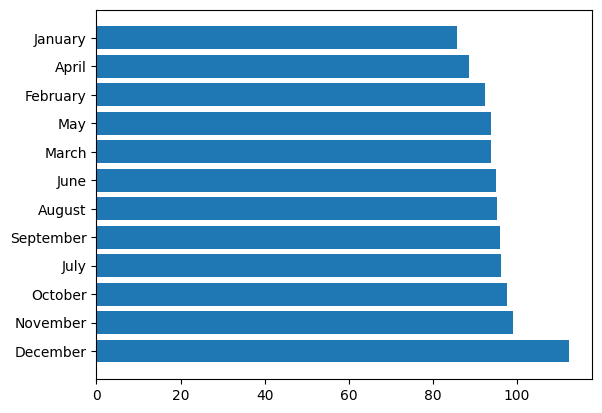

In [114]:
fig=plt.subplot()
plt.barh(dm.groupby('Month')['Aggregate'].mean().sort_values(ascending=False).index,dm.groupby('Month')['Aggregate'].mean().sort_values(ascending=False))

In [107]:
dm['Seasonal']=STL(dm.Aggregate).fit().seasonal

In [108]:
dm.groupby('Month')['Seasonal'].mean().sort_values(ascending=False)

Month
December     16.602435
November      3.540923
October       0.074603
July         -0.276049
March        -0.400941
February     -0.854240
September    -1.006272
June         -1.044825
August       -1.540016
May          -2.460980
January      -7.120795
April        -7.379556
Name: Seasonal, dtype: float64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Aggregate'], model='additive', freq=30)  # Assuming daily data with a 30-day seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Index'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='brown')
plt.legend(loc='upper left')
plt.tight_layout()
